# Multiple linear regression

- the multiple linear regression looks like: y = b0 + b1*x1 + b2*x2 ....
- In multiple linear regression there is no need feature scaling. 
- Backward elimination is not relevant in python sckitlearn, it will automatically select the relevant features. 
- Assumptions of linear regression : 
    1) linearity
    2) Homoscedasticity
    3) Multivariate (normality of error distribution)
    4) Independence
    5) Lack of multicollinearity (predictors are not correlated with each otehr)
    6) The outlier check: depending on the data include or exclude the outliers. 


In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, pointbiserialr
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [5]:
# Import the dataset
math = pd.read_csv("./student-mat.csv", sep=';', header=0)
por = pd.read_csv("./student-por.csv", sep=';', header=0)

# Feature Selection

In [21]:
#Feature selection based on the correlation of the dependent variable with the independent variables

from scipy.stats import pearsonr, pointbiserialr
from sklearn.preprocessing import LabelEncoder

# Specify the target column
target_column = 'G3'  # Target column name

# Separate numerical and categorical columns
numerical_features = math.select_dtypes(include=['number']).columns
categorical_features = math.select_dtypes(include=['object', 'category']).columns

# Dictionary to store correlation results
correlation_results = {}

# Handle numerical columns
for col in numerical_features:
    if col != target_column:
        correlation, p_value = pearsonr(math[col], math[target_column])
        correlation_results[col] = {'correlation': abs(correlation), 'p_value': p_value}

# Handle categorical columns
for col in categorical_features:
    if col != target_column:
        # Encode categorical values
        encoded_col = LabelEncoder().fit_transform(math[col])
        correlation, p_value = pointbiserialr(encoded_col, math[target_column])
        correlation_results[col] = {'correlation': abs(correlation), 'p_value': p_value}

# Sort features by correlation
sorted_features = sorted(correlation_results.items(), key=lambda x: x[1]['correlation'], reverse=True)

# Display top features with p-values
print("Feature Correlations and P-values with Target Variable:")
for feature, stats in sorted_features:
    print(f"{feature}: Correlation = {stats['correlation']:.2f}, P-value = {stats['p_value']:.20f}")


Feature Correlations and P-values with Target Variable:
G2: Correlation = 0.90, P-value = 0.00000000000000000000
G1: Correlation = 0.80, P-value = 0.00000000000000000000
failures: Correlation = 0.36, P-value = 0.00000000000014656628
Medu: Correlation = 0.22, P-value = 0.00001336107323691043
higher: Correlation = 0.18, P-value = 0.00026680015872819555
age: Correlation = 0.16, P-value = 0.00127143854571782483
Fedu: Correlation = 0.15, P-value = 0.00237997263233995747
goout: Correlation = 0.13, P-value = 0.00822900045014020309
romantic: Correlation = 0.13, P-value = 0.00971272639411914322
reason: Correlation = 0.12, P-value = 0.01526759364399367380
traveltime: Correlation = 0.12, P-value = 0.01986982596506127116
address: Correlation = 0.11, P-value = 0.03563267975655839276
sex: Correlation = 0.10, P-value = 0.03986533234152735139
Mjob: Correlation = 0.10, P-value = 0.04259030131116353646
paid: Correlation = 0.10, P-value = 0.04276506403357600850
internet: Correlation = 0.10, P-value = 0.0

In [23]:
print(numerical_features)
print(categorical_features)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


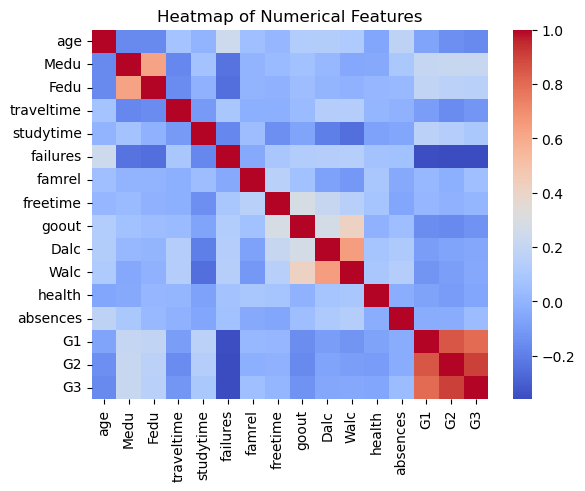

In [33]:
#correlation methods for mixed data

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for numerical features
numerical_corr = math[numerical_features].corr()
sns.heatmap(numerical_corr, annot=False, cmap='coolwarm')
plt.title("Heatmap of Numerical Features")
plt.show()

In [37]:
#########   Correlation with the method from David Boules


# F-statistics for correlation 
#target features is the final grade G3

target = "G3"
X = math.drop(columns = [target])
y = math[target]

In [145]:
# one way ANOVA test for the correlation of means between two or more groups
# assumption the data is normally distributed


from scipy.stats import f_oneway

#correlation between the categorical variables and the target variable of G3(final grading)
from sklearn.feature_selection import f_classif 
for col in categorical_features: 
    groups = [y[X[col] == value] for value in X[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"Feature: {col}, F_statistic:{f_stat}, P-value: {p_value}")
    

Feature: school, F_statistic:0.7980416422082741, P-value: 0.37222623713120817
Feature: sex, F_statistic:4.251814371189991, P-value: 0.03986533234152379
Feature: address, F_statistic:4.445163854236396, P-value: 0.03563267975655496
Feature: famsize, F_statistic:2.621832377243357, P-value: 0.10620482783858608
Feature: Pstatus, F_statistic:1.3269268029203884, P-value: 0.25005293926389094
Feature: Mjob, F_statistic:3.7544596189013513, P-value: 0.005194749939407733
Feature: Fjob, F_statistic:1.3029154881291376, P-value: 0.2683141692179653
Feature: reason, F_statistic:2.0799920508343344, P-value: 0.10233745609730463
Feature: guardian, F_statistic:1.5905172045230977, P-value: 0.2051326420058019
Feature: schoolsup, F_statistic:2.712167087836046, P-value: 0.10038496363909634
Feature: famsup, F_statistic:0.6035051787521449, P-value: 0.4377110858949449
Feature: paid, F_statistic:4.13145106484603, P-value: 0.04276506403357118
Feature: activities, F_statistic:0.10189216053999332, P-value: 0.74974027

A large F-statistic value proves that the regression model is effective in its explanation of the variation in the dependent variable and vice versa.

In [146]:
# filter numerical features
numerical_features= X.select_dtypes(include = [np.number]).columns

#perform F-test

f_scores, p_values = f_classif(X[numerical_features], y)

#display the results

for col, f_score, p_value in zip(numerical_features, f_scores, p_values):
    print(f"Feature: {col}, F_statistic:{f_stat}, P-value: {p_value}")


Feature: age, F_statistic:6.752697701286662, P-value: 0.13390861511377364
Feature: Medu, F_statistic:6.752697701286662, P-value: 0.013293842838456813
Feature: Fedu, F_statistic:6.752697701286662, P-value: 0.17772428632216972
Feature: traveltime, F_statistic:6.752697701286662, P-value: 0.266826043838495
Feature: studytime, F_statistic:6.752697701286662, P-value: 0.38971582558089873
Feature: failures, F_statistic:6.752697701286662, P-value: 1.3461123075821131e-12
Feature: famrel, F_statistic:6.752697701286662, P-value: 0.8932907202182168
Feature: freetime, F_statistic:6.752697701286662, P-value: 0.6356243360528511
Feature: goout, F_statistic:6.752697701286662, P-value: 0.06541004603128693
Feature: Dalc, F_statistic:6.752697701286662, P-value: 0.013249753904750512
Feature: Walc, F_statistic:6.752697701286662, P-value: 0.0011429348587857129
Feature: health, F_statistic:6.752697701286662, P-value: 0.3455891467296166
Feature: absences, F_statistic:6.752697701286662, P-value: 7.32759073568187

In [147]:
selected_features_num = [col for col, p_value in zip(numerical_features, p_values) if p_value < 0.05]
selected_features_cat = [col for col, p_value in zip(categorical_features, p_values) if p_value < 0.05]

print("Selected Features:", selected_features_num, selected_features_cat)

Selected Features: ['Medu', 'failures', 'Dalc', 'Walc', 'absences', 'G1', 'G2'] ['sex', 'Mjob', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher']


# Multiple linear regression with all the features in the dataset

In [46]:
#impor the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode categorical columns (if any)
df_encoded = por.copy()
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define the target column and features
X = df_encoded.drop(columns=["G3"])
y = df_encoded[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize Linear Regression model
regressor = LinearRegression()

# Fit the model
regressor.fit(X_train, y_train)

# Get coefficients (absolute value as importance)
importances = abs(regressor.coef_)  # Corrected to use 'regressor' instead of 'model'

# Sort features by importance
sorted_idx = importances.argsort()

# Display feature importance
print("Feature Importance from Linear Regression:")
for idx in sorted_idx[::-1]:  # Sorting in descending order
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")

# Predict using the test data
y_pred = regressor.predict(X_test)

# Display predictions vs actual values
np.set_printoptions(precision=2)  # Display only 2 decimals after the column for the numerical values
comparison = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1)  # Fixed the axis argument
print(comparison)

#getting the regression coefficients: 

print(regressor.coef_)
print(regressor.intercept_)


# Evaluating the model performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


Feature Importance from Linear Regression:
G2: 0.9062
paid: 0.3306
failures: 0.2608
school: 0.2377
schoolsup: 0.1753
Pstatus: 0.1620
sex: 0.1600
activities: 0.1540
traveltime: 0.1536
nursery: 0.1385
address: 0.1376
famsup: 0.1323
G1: 0.1276
higher: 0.1184
Fjob: 0.1132
reason: 0.0893
romantic: 0.0880
Medu: 0.0685
famsize: 0.0676
guardian: 0.0617
famrel: 0.0446
freetime: 0.0440
studytime: 0.0420
health: 0.0413
Dalc: 0.0374
Walc: 0.0317
internet: 0.0312
Fedu: 0.0256
goout: 0.0196
Mjob: 0.0188
age: 0.0180
absences: 0.0155
[[ 7.05  8.  ]
 [15.09 15.  ]
 [16.72 16.  ]
 [10.2  10.  ]
 [ 8.7  10.  ]
 [12.1  12.  ]
 [13.23 13.  ]
 [18.8  17.  ]
 [11.9  12.  ]
 [11.02 12.  ]
 [10.73 11.  ]
 [10.04 10.  ]
 [13.19 13.  ]
 [ 8.02  8.  ]
 [18.37 18.  ]
 [12.24 12.  ]
 [13.34 13.  ]
 [12.4  13.  ]
 [10.78 10.  ]
 [10.05 10.  ]
 [11.96 12.  ]
 [10.05 10.  ]
 [17.43 17.  ]
 [13.35 15.  ]
 [12.77 14.  ]
 [ 0.31  0.  ]
 [12.67 12.  ]
 [13.31 14.  ]
 [10.96 12.  ]
 [12.84  9.  ]
 [14.01 13.  ]
 [16.31 16.

0.857736727123655

- the model performed okayish with r2 value of 0.86 for the math class

# Multiple linear regression with the most relevant features from the correlation analyis: IndependentFeature versus G3

In [153]:
#see what  features are selected (p < 0.05):
print("Selected Features:", selected_features_num, selected_features_cat)

Selected Features: ['Medu', 'failures', 'Dalc', 'Walc', 'absences', 'G1', 'G2'] ['sex', 'Mjob', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher']


Selected Features: ['Medu', 'failures', 'Dalc', 'Walc', 'absences', 'G1', 'G2'] ['sex', 'Mjob', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher']

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import numpy as np

# Encode categorical columns (if any)
df_encoded = por.copy()

# Define the numerical and categorical columns
numerical_features = math.select_dtypes(include=['number']).columns
categorical_features = math.select_dtypes(include=['object', 'category']).columns

# Encode categorical features using LabelEncoder
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define the target column and features (corrected column selection)
target_column = "G3"
# input only the selected features into X
X = df_encoded[['Medu', 'failures', 'Dalc', 'Walc', 'absences', 'G1', 'G2', 'sex', 'Mjob', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher']]
y = df_encoded[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize Linear Regression model
regressor = LinearRegression()

# Fit the model
regressor.fit(X_train, y_train)

# Get coefficients (absolute value as importance)
importances = abs(regressor.coef_)

# Sort features by importance
sorted_idx = importances.argsort()

# Display feature importance
print("Feature Importance from Linear Regression:")
for idx in sorted_idx[::-1]:  # Sorting in descending order
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")

# Predict using the test data
y_pred = regressor.predict(X_test)

# Display predictions vs actual values
np.set_printoptions(precision=2)  # Display only 2 decimals after the column for the numerical values
comparison = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1)  # Fixed the axis argument
print("Predictions vs Actual values:")
print(comparison)

# Evaluating the model performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


Feature Importance from Linear Regression:
G2: 0.9049
failures: 0.2472
sex: 0.1775
schoolsup: 0.1447
nursery: 0.1421
G1: 0.1369
famsup: 0.1347
higher: 0.1173
activities: 0.1005
Medu: 0.0646
Dalc: 0.0539
Walc: 0.0516
absences: 0.0266
Mjob: 0.0134
Predictions vs Actual values:
[[ 7.31  8.  ]
 [14.42 15.  ]
 [16.31 16.  ]
 [10.37 10.  ]
 [ 8.88 10.  ]
 [12.72 12.  ]
 [13.03 13.  ]
 [18.63 17.  ]
 [11.85 12.  ]
 [11.32 12.  ]
 [10.82 11.  ]
 [10.35 10.  ]
 [13.51 13.  ]
 [ 8.37  8.  ]
 [18.45 18.  ]
 [12.12 12.  ]
 [12.9  13.  ]
 [12.24 13.  ]
 [10.54 10.  ]
 [ 9.96 10.  ]
 [12.16 12.  ]
 [10.28 10.  ]
 [17.47 17.  ]
 [13.21 15.  ]
 [12.41 14.  ]
 [ 0.57  0.  ]
 [12.09 12.  ]
 [13.28 14.  ]
 [11.28 12.  ]
 [12.58  9.  ]
 [13.56 13.  ]
 [16.89 16.  ]
 [13.3  13.  ]
 [16.36 16.  ]
 [12.98 12.  ]
 [ 8.71 10.  ]
 [ 9.31 10.  ]
 [11.15 11.  ]
 [13.   13.  ]
 [11.28 10.  ]
 [15.63 15.  ]
 [17.64 18.  ]
 [11.71 11.  ]
 [13.36 13.  ]
 [12.34 13.  ]
 [ 9.21 10.  ]
 [12.63 14.  ]
 [ 9.46  9.  ]
 [11

0.8560407112813921

r2 without feature selection: 0.8024720277757257
r2 with feature selection: 0.8577367271236548

# Rerunning the multiple linear regression model with K-Fold cross validation and hyperparameter tuning

In [62]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import r2_score

# Encode categorical columns (if any)
df_encoded = por.copy()
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define the target column and features
X = df_encoded.drop(columns=["G3"])
y = df_encoded["G3"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize Linear Regression model
regressor = LinearRegression()

# 1. K-Fold Cross-Validation (5-fold)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')  # Using R² score for regression
print(f"Cross-Validation R² scores for each fold: {cv_scores}")
print(f"Average Cross-Validation R² score: {cv_scores.mean()}")

# 2. Hyperparameter Tuning using RandomizedSearchCV (Ridge Regression as an example)
# Define the parameter distribution for Ridge Regression (L2 regularization)
param_dist = {
    'alpha': np.logspace(-5, 5, 10),  # Regularization strength (L2 penalty)
}

# Perform RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=Ridge(), param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', random_state=0)
random_search.fit(X_train, y_train)

# Best hyperparameters and best R² score
print(f"Best Hyperparameters from RandomizedSearchCV: {random_search.best_params_}")
print(f"Best R² score from RandomizedSearchCV: {random_search.best_score_}")

# 3. Fit the model with the best hyperparameters found by RandomizedSearchCV (Ridge Regression)
best_regressor = random_search.best_estimator_
best_regressor.fit(X_train, y_train)

# Predict using the test data
y_pred = best_regressor.predict(X_test)

# Display predictions vs actual values
np.set_printoptions(precision=2)  # Display only 2 decimals after the column for the numerical values
comparison = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1)
print("Predictions vs Actual:")
print(comparison)

# Get the regression coefficients and intercept
print("Coefficients:", best_regressor.coef_)
print("Intercept:", best_regressor.intercept_)

# Evaluating the model performance on the test set
r2_test_score = r2_score(y_test, y_pred)
print(f"R² score on the test set: {r2_test_score}")


Cross-Validation R² scores for each fold: [0.81 0.87 0.83 0.8  0.82]
Average Cross-Validation R² score: 0.8260140304285205
Best Hyperparameters from RandomizedSearchCV: {'alpha': 46.41588833612782}
Best R² score from RandomizedSearchCV: 0.8330988989806778
Predictions vs Actual:
[[ 7.18  8.  ]
 [14.95 15.  ]
 [16.56 16.  ]
 [10.21 10.  ]
 [ 8.85 10.  ]
 [12.3  12.  ]
 [13.22 13.  ]
 [18.68 17.  ]
 [11.91 12.  ]
 [11.11 12.  ]
 [10.75 11.  ]
 [10.07 10.  ]
 [13.36 13.  ]
 [ 8.04  8.  ]
 [18.36 18.  ]
 [12.25 12.  ]
 [13.24 13.  ]
 [12.34 13.  ]
 [10.64 10.  ]
 [10.11 10.  ]
 [12.1  12.  ]
 [10.02 10.  ]
 [17.42 17.  ]
 [13.28 15.  ]
 [12.62 14.  ]
 [ 0.44  0.  ]
 [12.53 12.  ]
 [13.21 14.  ]
 [11.16 12.  ]
 [12.72  9.  ]
 [13.89 13.  ]
 [16.58 16.  ]
 [13.2  13.  ]
 [16.12 16.  ]
 [12.61 12.  ]
 [ 8.82 10.  ]
 [ 9.29 10.  ]
 [11.25 11.  ]
 [12.94 13.  ]
 [11.06 10.  ]
 [15.48 15.  ]
 [17.68 18.  ]
 [11.12 11.  ]
 [13.47 13.  ]
 [12.21 13.  ]
 [ 9.09 10.  ]
 [12.58 14.  ]
 [ 8.96  9.  ]
 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [77]:
# Multiple linear regression with all the feaures + Scaling




# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.metrics import r2_score

# Define the target column and features
target_column = "G3"
X = por.drop(columns=[target_column])
y = por[target_column]

# Apply the scaler only to numerical columns
numerical_cols = X.select_dtypes(include=['number']).columns
sc_X = StandardScaler()
X[numerical_cols] = sc_X.fit_transform(X[numerical_cols])




# Encode categorical columns (if any)
categorical_features = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    X[col] = LabelEncoder().fit_transform(X[col])



X = X[['Medu', 'failures', 'Dalc', 'Walc', 'absences', 'G1', 'G2', 'sex', 'Mjob', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher']]

# Scale the target column
sc_y = StandardScaler()
y = sc_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize Linear Regression model
regressor = LinearRegression()

# Fit the model
regressor.fit(X_train, y_train)

# Get coefficients (absolute value as importance)
importances = abs(regressor.coef_)  # Corrected to use 'regressor' instead of 'model'

# Sort features by importance
sorted_idx = importances.argsort()

# Display feature importance
print("Feature Importance from Linear Regression:")
for idx in sorted_idx[::-1]:  # Sorting in descending order
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")

# Predict using the test data
y_pred = regressor.predict(X_test)

# Display predictions vs actual values


# Inverse transform the predictions and actual values to get them in original scale
y_pred_original = sc_y.inverse_transform(y_pred.reshape(-1, 1))  # Reshape to 2D for inverse_transform
y_test_original = sc_y.inverse_transform(y_test.reshape(-1, 1))

# Set the print options to avoid scientific notation and limit precision to 2 decimal places
np.set_printoptions(precision=2, suppress=True)

# Concatenate the predictions and actual values side by side
comparison = np.concatenate((y_pred_original, y_test_original), axis=1)

# Print the comparison
print("Predictions vs Actual:")
print(comparison)

# Getting the regression coefficients: 
print("\nCoefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Evaluating the model performance
r2 = r2_score(y_test, y_pred)
print(f"\nR² score on the test set: {r2:.4f}")


Feature Importance from Linear Regression:
G2: 0.8161
G1: 0.1164
sex: 0.0550
failures: 0.0454
schoolsup: 0.0448
nursery: 0.0440
famsup: 0.0417
absences: 0.0382
higher: 0.0363
activities: 0.0311
Medu: 0.0227
Walc: 0.0205
Dalc: 0.0154
Mjob: 0.0041
Predictions vs Actual:
[[ 7.31  8.  ]
 [14.42 15.  ]
 [16.31 16.  ]
 [10.37 10.  ]
 [ 8.88 10.  ]
 [12.72 12.  ]
 [13.03 13.  ]
 [18.63 17.  ]
 [11.85 12.  ]
 [11.32 12.  ]
 [10.82 11.  ]
 [10.35 10.  ]
 [13.51 13.  ]
 [ 8.37  8.  ]
 [18.45 18.  ]
 [12.12 12.  ]
 [12.9  13.  ]
 [12.24 13.  ]
 [10.54 10.  ]
 [ 9.96 10.  ]
 [12.16 12.  ]
 [10.28 10.  ]
 [17.47 17.  ]
 [13.21 15.  ]
 [12.41 14.  ]
 [ 0.57  0.  ]
 [12.09 12.  ]
 [13.28 14.  ]
 [11.28 12.  ]
 [12.58  9.  ]
 [13.56 13.  ]
 [16.89 16.  ]
 [13.3  13.  ]
 [16.36 16.  ]
 [12.98 12.  ]
 [ 8.71 10.  ]
 [ 9.31 10.  ]
 [11.15 11.  ]
 [13.   13.  ]
 [11.28 10.  ]
 [15.63 15.  ]
 [17.64 18.  ]
 [11.71 11.  ]
 [13.36 13.  ]
 [12.34 13.  ]
 [ 9.21 10.  ]
 [12.63 14.  ]
 [ 9.46  9.  ]
 [11.58 11.

In [79]:


# Hyperparameter tuning + all features + scaling 

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import r2_score

# Define the target column and features
target_column = "G3"
X = por.drop(columns=[target_column])
y = por[target_column]

# Apply the scaler only to numerical columns
numerical_cols = X.select_dtypes(include=['number']).columns
sc_X = StandardScaler()
X[numerical_cols] = sc_X.fit_transform(X[numerical_cols])




# Encode categorical columns (if any)
categorical_features = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    X[col] = LabelEncoder().fit_transform(X[col])



# Scale the target column
sc_y = StandardScaler()
y = sc_y.fit_transform(y.values.reshape(-1, 1)).flatten()


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize Linear Regression model
regressor = LinearRegression()

# 1. K-Fold Cross-Validation (5-fold)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')  # Using R² score for regression
print(f"Cross-Validation R² scores for each fold: {cv_scores}")
print(f"Average Cross-Validation R² score: {cv_scores.mean()}")

# 2. Hyperparameter Tuning using RandomizedSearchCV (Ridge Regression as an example)
# Define the parameter distribution for Ridge Regression (L2 regularization)
param_dist = {
    'alpha': np.logspace(-5, 5, 10),  # Regularization strength (L2 penalty)
}

# Perform RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=Ridge(), param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', random_state=0)
random_search.fit(X_train, y_train)

# Best hyperparameters and best R² score
print(f"Best Hyperparameters from RandomizedSearchCV: {random_search.best_params_}")
print(f"Best R² score from RandomizedSearchCV: {random_search.best_score_}")

# 3. Fit the model with the best hyperparameters found by RandomizedSearchCV (Ridge Regression)
best_regressor = random_search.best_estimator_
best_regressor.fit(X_train, y_train)

# Predict using the test data
y_pred = best_regressor.predict(X_test)

# Display predictions vs actual values
np.set_printoptions(precision=2)  # Display only 2 decimals after the column for the numerical values
comparison = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
print("Predictions vs Actual:")
print(comparison)

# Get the regression coefficients and intercept
print("Coefficients:", best_regressor.coef_)
print("Intercept:", best_regressor.intercept_)

# Evaluating the model performance on the test set
r2_test_score = r2_score(y_test, y_pred)
print(f"R² score on the test set: {r2_test_score}")


Cross-Validation R² scores for each fold: [0.81 0.87 0.83 0.8  0.82]
Average Cross-Validation R² score: 0.8260140304285205
Best Hyperparameters from RandomizedSearchCV: {'alpha': 3.593813663804626}
Best R² score from RandomizedSearchCV: 0.8267272452918156


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AttributeError: 'numpy.ndarray' object has no attribute 'values'